   position             team    points       won      lost      draw  \
0         1         Valencia  0.125720  0.987086 -1.839031 -0.518105   
1         2        Barcelona  0.125720  1.195687 -1.616686 -1.126993   
2         3  Atlético Madrid  0.059494  0.778485 -1.839031 -0.213661   
3         4      Real Madrid -0.006732  0.778485 -1.616686 -0.518105   
4         5  Atlético Bilbao -0.404089  0.152681 -0.949652 -0.518105   

     played  goals_for  goals_against  goal_difference     year  
0 -1.477619  -0.429859      -2.291983         0.081762  1970-71  
1 -1.477619   0.145984      -2.052556         0.097129  1970-71  
2 -1.477619   0.209967      -2.212174         0.107343  1970-71  
3 -1.477619  -0.109946      -1.892938         0.078147  1970-71  
4 -1.477619  -0.493842      -1.334276         0.035091  1970-71  
(178, 11)
position             int64
team                object
points             float64
won                float64
lost               float64
draw               float64

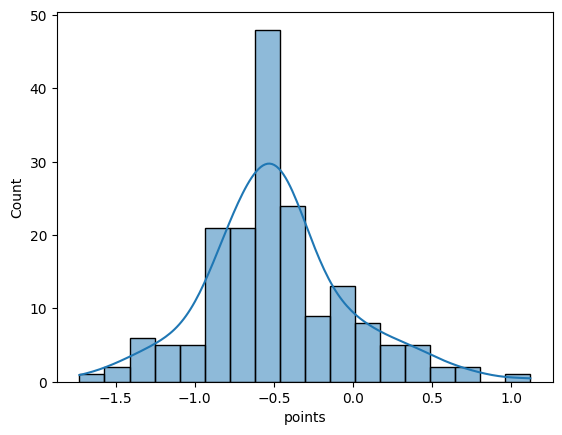

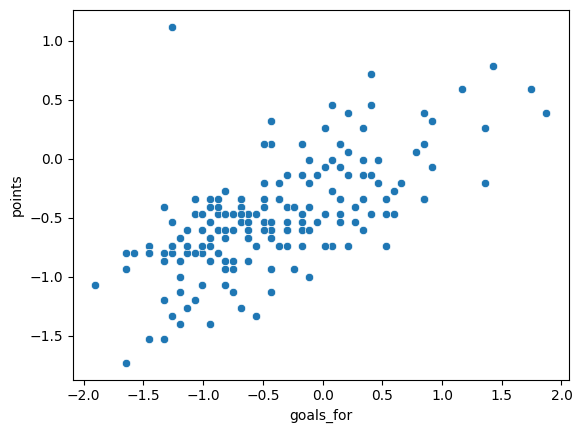

C:\Users\Sneha\AppData\Local\Temp\ipykernel_45328\2775615444.py:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(la_liga.corr(), annot=True, cmap='coolwarm')


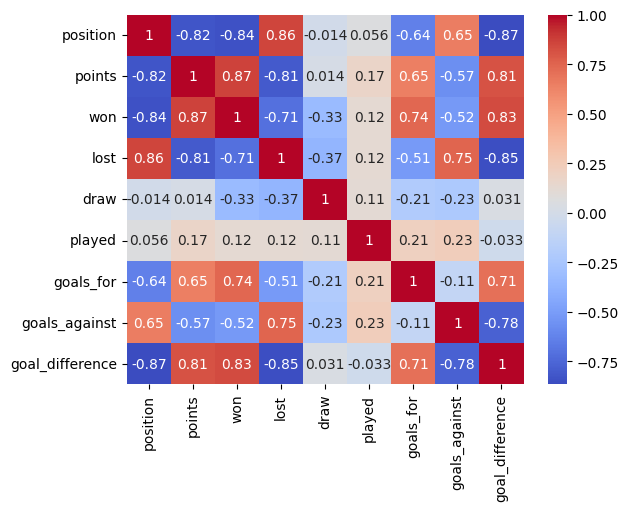

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
arr=[]
year1=1970
year2=1971
while(year1!=1980):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./normalized_data/"+string+"_normalized.csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
     
data= la_liga[['position', 'team', 'points', 'won', 'lost', 'draw', 'played', 'goals_for', 'goal_difference']]
print(la_liga.head())


print(la_liga.shape)


print(la_liga.dtypes)


print(la_liga.isnull().sum())


print(la_liga.describe())


sns.histplot(la_liga['points'], kde=True)
plt.show()


sns.scatterplot(x='goals_for', y='points', data=la_liga)
plt.show()

sns.heatmap(la_liga.corr(), annot=True, cmap='coolwarm')
plt.show()


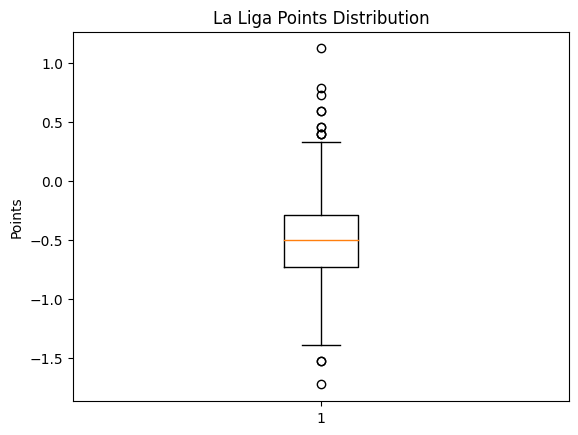

Outliers:
    position             team    points       won      lost      draw  \
14        15            Elche -1.529931 -1.933332  0.606760  0.395227   
15        16         Zaragoza -1.728609 -2.141933  1.051449  0.090783   
0          1      Real Madrid  0.390624  1.195687 -1.616686  0.090783   
0          1  Atlético Madrid  0.456850  1.404289 -1.616686 -0.213661   
0          1        Barcelona  0.589302  1.612890 -1.839031 -0.213661   
0          1      Real Madrid  0.589302  1.404289 -2.061375  0.395227   
0          1      Real Madrid  0.456850  1.404289 -1.616686 -0.213661   
17        18           Málaga -1.529931 -1.516129  1.940827 -0.822549   
0          1      Real Madrid  0.390624  1.821491 -0.949652 -1.735881   
0          1      Real Madrid  0.390624  0.569884 -2.283720  1.917447   
0          1      Real Madrid  0.787980  1.821491 -2.283720  0.090783   
1          2    Real Sociedad  0.721754  1.195687 -2.728409  1.613003   
17        18           Málaga  1.119110 -

In [9]:
plt.boxplot(la_liga['points'])


plt.title('La Liga Points Distribution')
plt.ylabel('Points')

plt.show()


q1 = la_liga['points'].quantile(0.25)
q3 = la_liga['points'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr

outliers = la_liga[(la_liga['points'] > upper_bound) | (la_liga['points'] < lower_bound)]
print('Outliers:')
print(outliers)

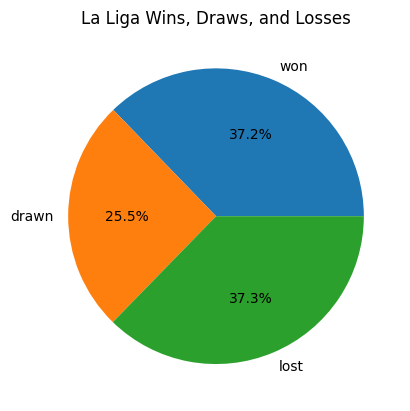

In [10]:
arr=[]
year1=1970
year2=1971
while(year1!=1980):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./orig_data/laliga_points_table_"+string+".csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
data= la_liga[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points']]

wins = la_liga['won'].sum()
draws = la_liga['drawn'].sum()
losses = la_liga['lost'].sum()

values = [wins, draws, losses]
labels = ['won', 'drawn', 'lost']
plt.pie(values, labels=labels, autopct='%1.1f%%')


plt.title('La Liga Wins, Draws, and Losses')


plt.show()